## Observations and Insights 

Summary Analysis:
1. Based on the scatterplot and r value correlation, there is a strong connection based on tumor volume and mice's weight.
2. The tumor_stats table is comprised of the final tumor vol measured for each mouse. In the tumor stats table, of the 4 drugs measured, Capomulin and Ramicane were the most effective in decreasing tumor volume. 
3. Statistical significance is found with a sample size of 30 or greater. Since each drug regimen has a data point of over 100 each (shown in bar graph), this is would be considered a good test dataset.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_data,study_results, how = 'right', on = 'Mouse ID')

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts()

g989    13
j989    10
f545    10
c282    10
k382    10
m601    10
z795    10
a644    10
r811    10
e213    10
g316    10
w151    10
j119    10
s185    10
y769    10
t451    10
a685    10
o562    10
l725    10
l509    10
g791    10
w350    10
j913    10
x773    10
i334    10
j984    10
c758    10
c766    10
z581    10
l471    10
        ..
z435     3
l215     3
x111     3
v339     2
c326     2
s619     2
n630     2
m756     2
o813     2
w140     2
z314     2
w678     2
w746     2
y601     2
h531     2
f278     2
z234     2
f394     2
v199     1
x226     1
n482     1
h428     1
x336     1
f932     1
l872     1
b447     1
d133     1
t573     1
u153     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
print(duplicate_mouse_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
#shows just the value of the duplicate mouse id
duplicate_mouse_id = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# is in is better than == because == will only choose one value rather than isin which can hold a list, df or series.
mouse_study_df.loc[mouse_study_df["Mouse ID"].isin(duplicate_mouse_id)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# index_mouse_study_df = mouse_study_df.set_index('Mouse ID')
# clean_mouse_study_df = index_mouse_study_df.drop('g989')
clean_mouse_study_df = pd.DataFrame(mouse_study_df[~mouse_study_df['Mouse ID'].isin(duplicate_mouse_id)])

len(clean_mouse_study_df)

1880

In [7]:
# Checking the number of mice in the clean DataFrame.
print(f'Unique Number of Mice: {clean_mouse_study_df["Mouse ID"].nunique()}')

Unique Number of Mice: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_summary_df = clean_mouse_study_df.groupby('Drug Regimen')
drug_summary_df.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_summary_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_summary_df['Tumor Volume (mm3)'].median()
tumor_var = drug_summary_df['Tumor Volume (mm3)'].var()
tumor_std = drug_summary_df['Tumor Volume (mm3)'].std()
tumor_sem = drug_summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary_df = pd.DataFrame({' Tumor Mean':tumor_mean, 'Tumor Median':tumor_median, 
                                 'Tumor Variance':tumor_var,
                                 'Tumor Std Dev':tumor_std, 'Tumor SEM':tumor_sem})
tumor_summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# used function .agg() on the Tumor panda series and applied the aggregation functions required
tumor_summary_2 = clean_mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

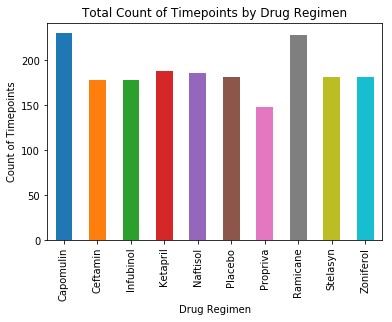

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#grouping the count of timepoint data by rx. Total should be 1880 (rows of data minus duplicate)
timepoints = clean_mouse_study_df.groupby(['Drug Regimen'])['Timepoint'].count()
# timepoints.sum()

#set chart to variable and add labels using pandas
timepoint_chart = timepoints.plot(kind='bar', title='Total Count of Timepoints by Drug Regimen')
timepoint_chart.set_xlabel('Drug Regimen')
timepoint_chart.set_ylabel('Count of Timepoints')

#display output
plt.show()

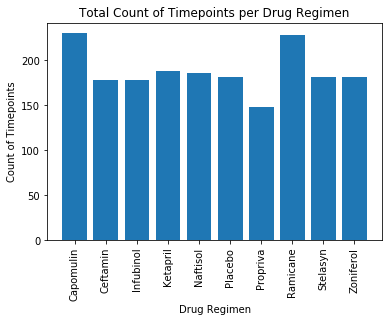

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#bar plot and its values
plt.bar(timepoints.index,timepoints.values)
#bar labels
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Timepoints')
plt.title('Total Count of Timepoints per Drug Regimen')
#Display output
plt.show()

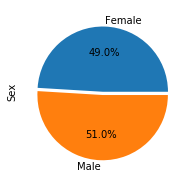

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# x axis as variable for both examples
gender_count = clean_mouse_study_df.groupby(['Sex'])['Sex'].count()
# generate plot and labels using pandas
gender_count_chart = gender_count.plot.pie(explode=[0,0.05],subplots=True,autopct="%1.1f%%", figsize=(3,3))

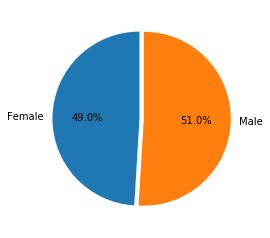

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = plt.pie(gender_count,explode=[0,0.05], labels=gender_count.index, autopct="%1.1f%%", startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# only one of the treatments is gonna have an outlier, everything else will be empty for 2 boxes down

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = pd.DataFrame(clean_mouse_study_df.groupby(['Mouse ID'])["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(clean_mouse_study_df,final_tumor_vol,on=['Mouse ID','Timepoint'], how='right')
final_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
f_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor = []
ram_tumor = []
inf_tumor = []
ceft_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, x in final_tumor_df.iterrows():
    if x['Drug Regimen'] == "Capomulin":
        cap_tumor.append(x["Tumor Volume (mm3)"])
    if x['Drug Regimen'] == "Ramicane":
        ram_tumor.append(x["Tumor Volume (mm3)"])
    if x['Drug Regimen'] == "Infubinol":
        inf_tumor.append(x["Tumor Volume (mm3)"]) 
    if x['Drug Regimen'] == "Ceftamin":
        ceft_tumor.append(x["Tumor Volume (mm3)"]) 
        
    # get table of drugs and their tumor vol values 
drugs_df = pd.DataFrame({f_drugs[0]:cap_tumor, f_drugs[1]:ram_tumor, f_drugs[2]: inf_tumor,
                         f_drugs[3]:ceft_tumor})  
drugs_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078


In [17]:
# Quartiles

    #set up quartiles and other variables as line item by drug as column
lower_q = drugs_df[f_drugs].quantile([.25])
upper_q = drugs_df[f_drugs].quantile([.75])
median_q = drugs_df[f_drugs].quantile([.5])
max_tumor = drugs_df[f_drugs].max()
min_tumor = drugs_df[f_drugs].min()
# print(lower_q)

# i pivoted the data from my variables above using iloc and then append in the IQR,low B, upp B with formula
tumor_stats = pd.DataFrame({"Lower Quartile":lower_q.iloc[0],"Upper Quartile":upper_q.iloc[0],
              'Median':median_q.iloc[0],"Max":max_tumor, "Min":min_tumor})
tumor_stats['IQR'] = tumor_stats["Upper Quartile"]-tumor_stats['Lower Quartile'].values
tumor_stats["Lower Bound"] = tumor_stats['Lower Quartile'] - (1.5*tumor_stats['IQR']).values
tumor_stats["Upper Bound"] = tumor_stats['Upper Quartile'] + (1.5*tumor_stats['IQR']).values

# reset index and gave old index name of drug regimen
tumor_stats = tumor_stats.reset_index().rename(columns={'index': 'Drug Regimen'})
tumor_stats

,Drug Regimen,Lower Quartile,Upper Quartile,Median,Max,Min,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,38.125164,47.685963,23.343598,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,36.561652,45.220869,22.050126,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,60.165180,72.226731,36.321346,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,59.851956,68.923185,45.000000,15.577752,25.355450,87.666458


In [18]:
#Determine Outliers
# created nested for loop to:
# 1. iterate through drug list, 
# 2. find rows in tumor data to match to drugs in drug list, 
# 3. if drug in list matched drug regimen name, then check to see if that same row had a higher or lower value than the upper or lower bound.
# 4.  if so, print the name of drug and value
# TEST: tumor_stats.loc[tumor_stats['Drug Regimen'] == "Capomulin" ]['Upper Bound'].values

for x in f_drugs:
    for i, j in final_tumor_df.iterrows():
        if j['Drug Regimen'] == x: 
#             print(f"{x} | {j['Tumor Volume (mm3)']}")
            if j['Tumor Volume (mm3)'] > tumor_stats.loc[tumor_stats['Drug Regimen'] == x ]['Upper Bound'].values or j['Tumor Volume (mm3)'] < tumor_stats.loc[tumor_stats['Drug Regimen'] == x ]['Lower Bound'].values:
                print(f"{x} has an outlier for tumor volume, {j['Tumor Volume (mm3)']} is lower than its lower bound of {tumor_stats.loc[tumor_stats['Drug Regimen'] == x ]['Lower Bound'].values}")


Infubinol has an outlier for tumor volume, 36.321345799999996 is lower than its lower bound of [36.83290495]


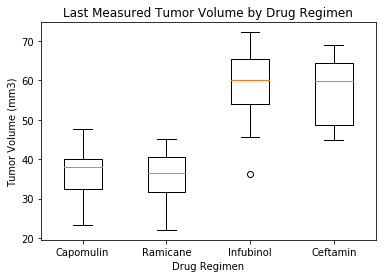

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_list = [drugs_df[f_drugs[0]],
            drugs_df[f_drugs[1]],
            drugs_df[f_drugs[2]],
            drugs_df[f_drugs[3]]
           ]
# box_list
fig1, ax = plt.subplots()
ax.set_title('Last Measured Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(box_list)
plt.xticks([1,2,3,4],f_drugs)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

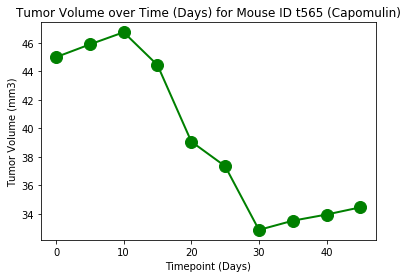

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#created a variable to choose a random mouse that fits drug regimen criteria
cap_mouse = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin')]['Mouse ID'].sample(n=1)
# "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
# format cap_mouse to fit format of mouse id
random_cap = str(cap_mouse.values)[2:-2]
# static_id = s710

# setting variables for line chart
line_df = clean_mouse_study_df.loc[clean_mouse_study_df['Mouse ID']==random_cap,:]
line_df
x_axis = line_df['Timepoint']
y_axis = line_df["Tumor Volume (mm3)"]

#plot and label
plt.plot(x_axis,y_axis, color='green', marker='o',linewidth=2, markersize=12)
plt.title(f"Tumor Volume over Time (Days) for Mouse ID {random_cap} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('linechart')
plt.show()

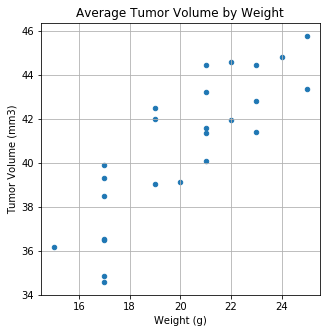

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get all mouse ids that fit criteria
cap_mouse_df = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin')]

#group by mouse id and find avg vol
cap_avg_df = cap_mouse_df.groupby(['Mouse ID']).mean()

#plot scatter and name values
cap_avg_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(5,5),
              title="Average Tumor Volume by Weight")
plt.savefig('scatterplot')
plt.show()

# "Capomulin", "Ramicane", "Infubinol", "Ceftamin"

## Correlation and Regression

Correlation is high between average mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708717


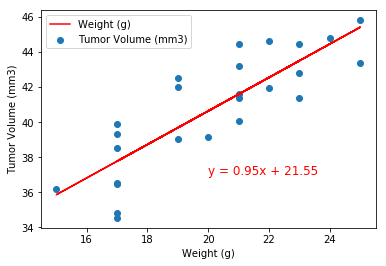

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#calculate correlation value and print
correlation = round(st.pearsonr(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"Correlation is high between average mouse weight and average tumor volume is {correlation}")

# store x and y axis values
x_values = cap_avg_df['Weight (g)']
y_values= cap_avg_df['Tumor Volume (mm3)']
#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot linear regression on top of scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=12,color="red")
#label and show
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.legend()
plt.savefig('linearregression')
plt.show()